In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/regression/kc_house_data.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

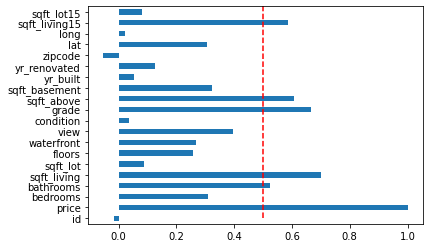

In [9]:
df.corrwith(df.price).plot(kind='barh')
plt.vlines(x=0.5,ymin=0,ymax=100,linestyles='dashed',colors='red')
plt.show()

In [11]:
selected_cols = ['bathrooms','sqft_living',
                'grade','sqft_above','sqft_living']
df_selected = df[selected_cols]
df_selected

,bathrooms,sqft_living,grade,sqft_above,sqft_living
0,1.00,1180,7,1180,1180
1,2.25,2570,7,2170,2570
2,1.00,770,6,770,770
3,3.00,1960,7,1050,1960
4,2.00,1680,8,1680,1680
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,2310
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1600


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)
y = df.price
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

Ready For Training

In [19]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dtest = xgb.DMatrix(Xtest, label=ytest)

In [20]:
params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 0.1,
}

In [26]:
results = xgb.cv(params,
                dtrain,
                num_boost_round=50,
                nfold=5,
                early_stopping_rounds=5,
                metrics=['rmse','mae'])

In [27]:
results.tail()

,train-rmse-mean,train-rmse-std,train-mae-mean,train-mae-std,test-rmse-mean,test-rmse-std,test-mae-mean,test-mae-std
23,210174.112549,1250.596083,138664.520231,401.807918,229435.378316,8495.721406,145509.335279,1335.715765
24,208470.447014,1223.364041,138157.341085,403.053883,228400.314240,8264.201241,145248.143338,1295.415011
25,206984.544983,1225.064355,137747.455424,427.754209,227428.380805,8157.968915,145059.566627,1258.356295
26,205711.838238,1174.631764,137432.544741,411.810949,226637.515082,8064.774801,144953.344563,1248.235023
27,204510.463376,1278.422730,137155.329378,450.821398,226039.168834,7979.962425,144930.858497,1214.294410


In [28]:
px.line(results, x=results.index, y=['train-rmse-mean','test-rmse-mean'], title='RMSE of Training and Test Data')

In [29]:
px.line(results, x=results.index, y=['train-mae-mean','test-mae-mean'], title='MAE of Training and Test Data')